In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path) # Reads image as BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converts image to RGB

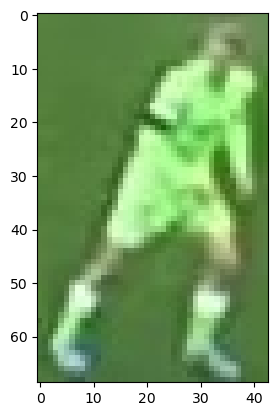

In [3]:
plt.imshow(image)

# Take the top half of the image

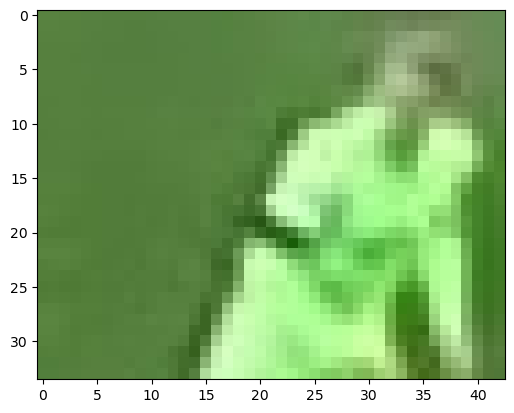

In [4]:
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# Cluster the image into two clusters

/home/swaroop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


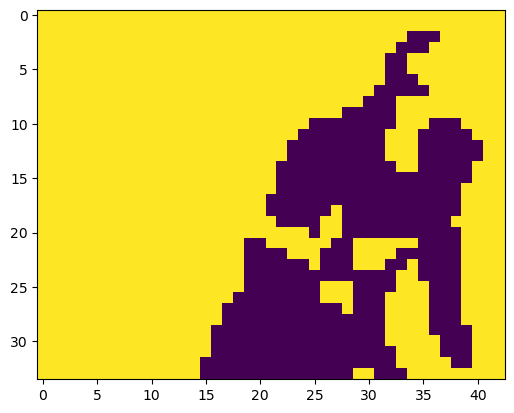

In [11]:
# Reshpae the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Performa k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [12]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([169.28746929, 233.09336609, 143.58968059])